In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


pd.options.mode.chained_assignment = None

In [2]:
dt = pd.read_csv("Resources/top2018.csv")
dt.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [3]:
testdf = dt.drop(["id", "name", "artists", "time_signature", "duration_ms", "instrumentalness", "liveness"], axis=1)

In [4]:
testdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,valence,tempo
0,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.357,77.169
1,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.473,75.023
2,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.140,159.847
3,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.439,140.124
4,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.350,91.030


In [5]:
X_train, X_test, y_train, y_test = train_test_split(testdf.drop('valence', 1), testdf['valence'], test_size = .15, random_state=10)

In [6]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     119.8
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           3.10e-40
Time:                        20:01:07   Log-Likelihood:                 44.223
No. Observations:                  85   AIC:                            -72.45
Df Residuals:                      77   BIC:                            -52.90
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
danceability     0.6706      0.104      6.436      0.000       0.463       0.878
energy           0.3816      0.103      3.717      0.000       0.177       0.586
key              0.0026      0.005      0.547      0.586      -0.007       0.012
loudness         0.0249      0.010      2.423      0.018       0.004       0.045
mode            -0.0862      0.035     -2.493      0.015      -0.155      -0.017
speechiness     -0.2466      0.165     -1.498      0.138      -0.574       0.081
acousticness     0.1305      0.078      1.676      0.098      -0.025       0.286
tempo           -0.0005      0.001     -0.924      0.358      -0.002       0.001
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.490
Skew:                           0.185   Prob(JB):                        0.783
Kurtosis:                       2.966   Cond. No.                     1.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
perm = PermutationImportance(model2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3369 ± 0.3547,energy
0.3160 ± 0.1782,danceability
0.1254 ± 0.1745,acousticness
0.0385 ± 0.1581,loudness
-0.0049 ± 0.0537,tempo
-0.0353 ± 0.1024,speechiness
-0.0388 ± 0.0757,key
-0.0890 ± 0.1867,mode


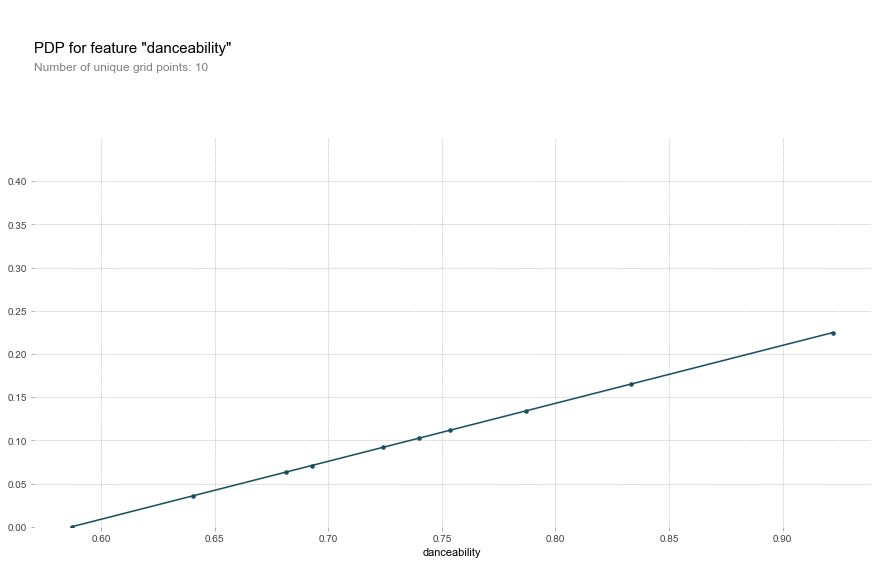

In [60]:
base_features = testdf.columns.values.tolist()
base_features.remove('valence')

feat_name = 'danceability'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

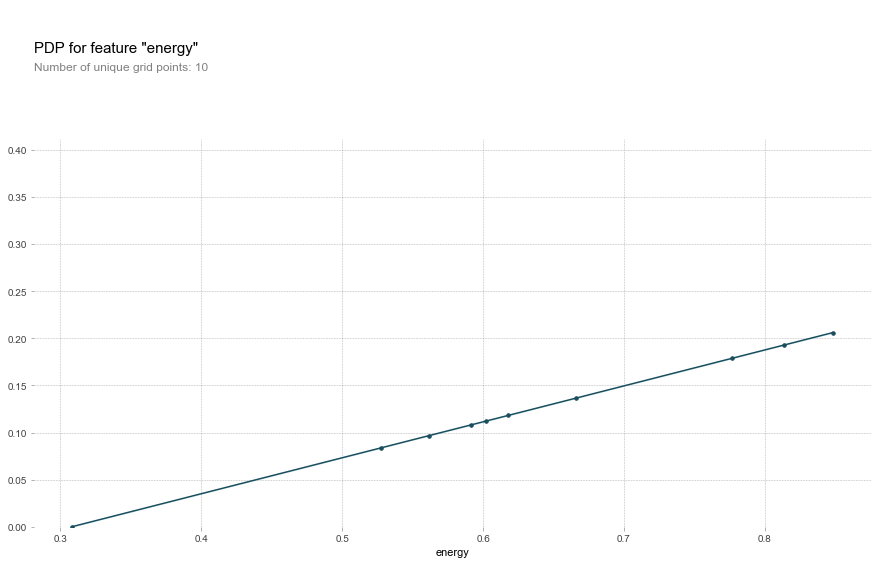

In [61]:
feat_name = 'energy'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

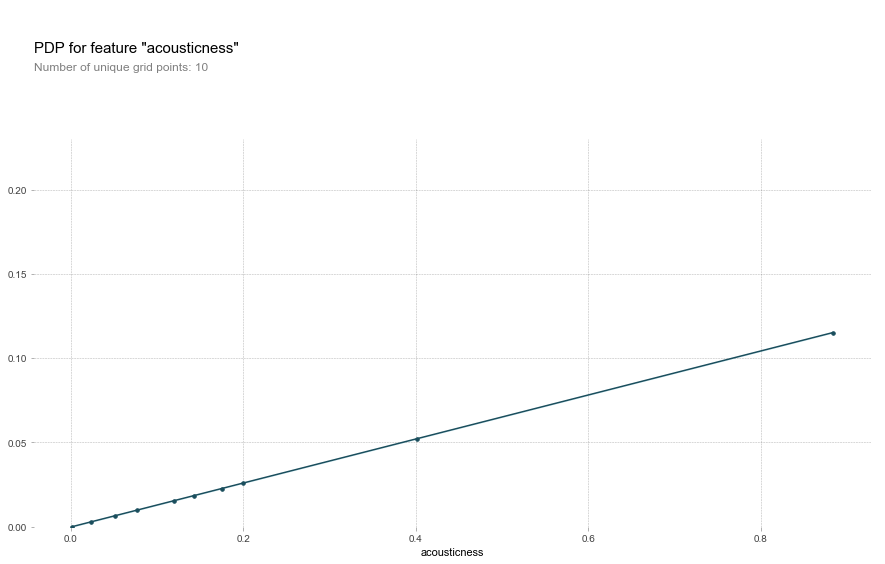

In [62]:
feat_name = 'acousticness'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

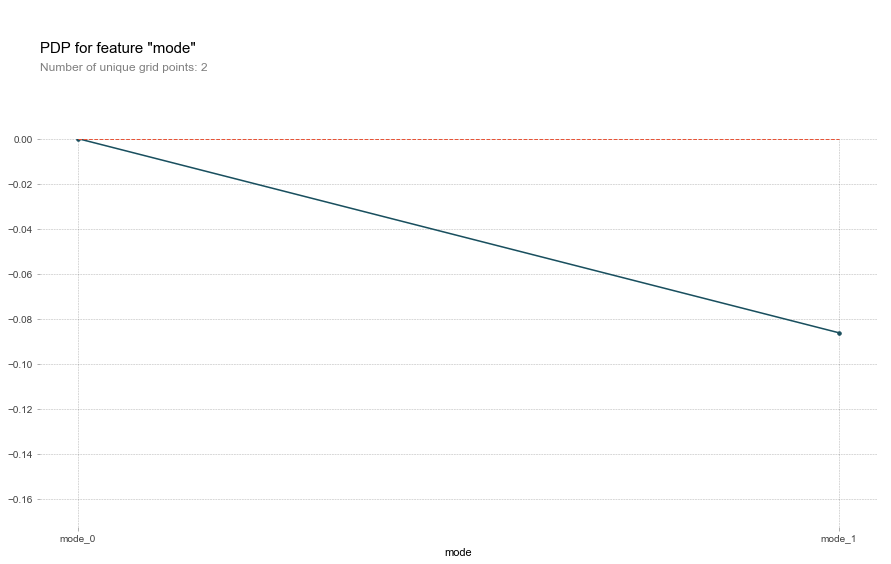

In [63]:
feat_name = 'mode'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

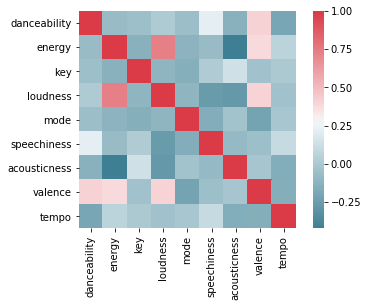

In [64]:
corr = testdf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [65]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(testdf.drop('danceability', 1), testdf['danceability'], test_size = .15, random_state=10)

In [66]:
modeldance = LinearRegression()
modeldance.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
perm2 = PermutationImportance(modeldance, random_state=1).fit(X_test1, y_test1)
eli5.show_weights(perm2, feature_names = X_test1.columns.tolist())

Weight,Feature
1.3331 ± 0.8103,energy
0.6063 ± 0.4942,valence
0.4908 ± 0.4255,acousticness
0.1250 ± 0.3022,speechiness
0.1232 ± 0.3008,tempo
0.0142 ± 0.0486,mode
-0.0505 ± 0.1717,loudness
-0.1930 ± 0.2791,key


In [13]:
testdf2 = dt.drop(["id", "name", "artists", "time_signature", "duration_ms", "instrumentalness", "speechiness", "mode", "tempo", "liveness", "key", "loudness"], axis=1)

In [79]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(testdf2.drop('valence', 1), testdf['valence'], test_size = .15, random_state=10)

In [87]:
model3 = sm.OLS(y_train2, X_train2).fit()
predictions3 = model.predict(X_test2)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     223.0
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           7.17e-43
Time:                        17:23:23   Log-Likelihood:                 39.425
No. Observations:                  85   AIC:                            -70.85
Df Residuals:                      81   BIC:                            -61.08
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
danceability     0.6507      0.107      6.104      0.000       0.439       0.863
energy           0.3128      0.086      3.633      0.000       0.141       0.484
loudness         0.0377      0.009      4.368      0.000       0.021       0.055
acousticness     0.1624      0.079      2.061      0.042       0.006       0.319
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.078
Skew:                           0.035   Prob(JB):                        0.962
Kurtosis:                       2.869   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model4 = LinearRegression()
model4.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.21221842302980198

19    0.498894
14    0.607666
43    0.469412
37    0.568575
66    0.534216
3     0.447456
79    0.518586
41    0.679169
38    0.294949
68    0.525725
2     0.338392
1     0.530907
60    0.564432
53    0.512153
95    0.385870
dtype: float64

19    0.595
14    0.437
43    0.288
37    0.305
66    0.839
3     0.439
79    0.158
41    0.828
38    0.520
68    0.419
2     0.140
1     0.473
60    0.603
53    0.755
95    0.284
Name: valence, dtype: float64

In [94]:
model3df = pd.DataFrame({"Predicted":predictions3, "Actual":y_test2})
model3df

,Predicted,Actual
19,0.498894,0.595
14,0.607666,0.437
43,0.469412,0.288
37,0.568575,0.305
66,0.534216,0.839
3,0.447456,0.439
79,0.518586,0.158
41,0.679169,0.828
38,0.294949,0.520
68,0.525725,0.419


In [109]:
model3df["Error"] = (((y_test2-predictions3)/predictions3)).map("{:.2%}".format)
model3df

,Predicted,Actual,Error
19,0.498894,0.595,19.26%
14,0.607666,0.437,-28.09%
43,0.469412,0.288,-38.65%
37,0.568575,0.305,-46.36%
66,0.534216,0.839,57.05%
3,0.447456,0.439,-1.89%
79,0.518586,0.158,-69.53%
41,0.679169,0.828,21.91%
38,0.294949,0.520,76.30%
68,0.525725,0.419,-20.30%
